Linear and Ridge Regression with scaling

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pymatgen.core.periodic_table import Element
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Generate some data with noise
prng = np.random.RandomState(1234567890)
atomic_mass=[]
Z=np.arange(1,119)

noise = prng.normal(0,30, len(Z))

for ielement, element in enumerate(Z):
    el=Element.from_Z(element)
    # add noise to the first datapoints
    atomic_mass.append(el.atomic_mass+noise[ielement])

X=np.vstack((Z,Z**2,Z**3, Z**4, Z**5, Z**6)).T
y=atomic_mass

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Apply scaling to train and test sets
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LinearRegression().fit(X_train,y_train)

# Get LR score for train and test sets 
# Training data
print("Linear Regression")
print('R2 training set:',lr.score(X_train,y_train))

pred_train = lr.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
print('R2 test set:',lr.score(X_test,y_test))

pred = lr.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))


# Ridge regression
ridge=Ridge(alpha=1, max_iter=100000).fit(X_train,y_train)

# Get LR score for train and test sets #
print("Ridge Regression")
# Training data
print('R2 training set:',ridge.score(X_train,y_train))

pred_train = ridge.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
print('R2 test set:', ridge.score(X_test, y_test))

pred = ridge.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

Linear Regression
R2 training set: 0.8924958320544908
MSE training set 785.76
R2 test set: 0.8467519179367322
MSE test set 1128.26
Ridge Regression
R2 training set: 0.8841624235615133
MSE training set 846.68
R2 test set: 0.8628997132223486
MSE test set 1009.37


Linear and Ridge regression without scaling

In [4]:
# Generate some data with noise
prng = np.random.RandomState(1234567890)
atomic_mass=[]
Z=np.arange(1,119)

noise = prng.normal(0,30, len(Z))

for ielement, element in enumerate(Z):
    el=Element.from_Z(element)
    # add noise to the first datapoints
    atomic_mass.append(el.atomic_mass+noise[ielement])

X=np.vstack((Z,Z**2,Z**3, Z**4, Z**5, Z**6)).T
y=atomic_mass

# Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train,y_train)

# Get LR score for train and test sets 
# Training data
print("Linear Regression")
print('R2 training set:',lr.score(X_train,y_train))

pred_train = lr.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
print('R2 test set:',lr.score(X_test,y_test))

pred = lr.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))


# Ridge regression
ridge=Ridge(alpha=1, max_iter=100000).fit(X_train,y_train)

print("Ridge Regression")
# Get LR score for train and test sets 
# Training data
print('R2 training set:',ridge.score(X_train,y_train))

pred_train = ridge.predict(X_train)
mse_train = mean_squared_error(y_train, pred_train)
print('MSE training set', round(mse_train, 2))

# Test data
print('R2 test set:', ridge.score(X_test, y_test))

pred = ridge.predict(X_test)
mse_test =mean_squared_error(y_test, pred)
print('MSE test set', round(mse_test, 2))

Linear Regression
R2 training set: 0.8924958320537993
MSE training set 785.76
R2 test set: 0.8467518001502304
MSE test set 1128.26
Ridge Regression
R2 training set: 0.8924851165327834
MSE training set 785.84
R2 test set: 0.8479047113520315
MSE test set 1119.77


/home/da36nik/miniconda3/envs/MI_10/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=5.51717e-25): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Influence on the scaling:
- same performance (R2 and MSE nearly the same) for linear regression
- For ridge regression the performance without the scaling is worse

--> the standard scaler transforms each feature that it has a mean of 0 and a standard deviation of 1. The linear model finds the fit regardless of the feature scale (therefore same performance). Since the ridge regression model penalizes large weights. This penalty will disproportionately hit larger values which leads to a shrinking of the weights of these features (even if there are more important). The scaling removes this problem which explains the worse model performance without the scaling.

Metal or not

ElementProperty:   0%|          | 0/1661 [00:00<?, ?it/s]

/home/da36nik/miniconda3/envs/MI_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


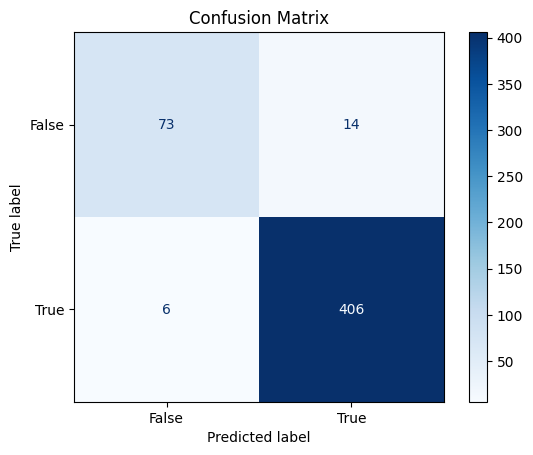

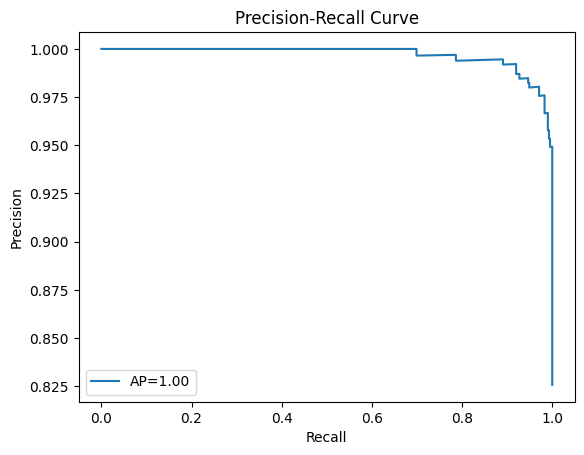

In [5]:
import pandas as pd
from matminer.featurizers.composition import ElementProperty
from pymatgen.core import Composition
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score


# load dataset
path = r"/home/da36nik/Documents/Material_Informatics/Exercise_10/composition_metal.csv"
df = pd.read_csv(path, sep=",")

# convert composition strings to pymatgen Composition objects
df["composition"] = df["composition"].apply(Composition)

# featurize with MagPie
featurizer = ElementProperty.from_preset("magpie")
df_feat = featurizer.featurize_dataframe(df, col_id="composition", ignore_errors=True, return_errors=True)

# Prepare features and labels
X = df_feat[featurizer.feature_labels()]  # Only use MagPie features
y = df_feat["is_metal"] # define the label --> metal or not

# train/test split --> stratify makes sure that there is the same share of metals and no-metals in the training and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=10, stratify=y)

# train logistic regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluation
y_pred = clf.predict(X_test)
y_score = clf.decision_function(X_test)  # For precision-recall curve

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
ap = average_precision_score(y_test, y_score)
plt.figure()
plt.plot(recall, precision, label=f"AP={ap:.2f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

Material IDs

In [ ]:
from mp_api.client import MPRester


# load the material id's
path = r"/home/da36nik/Documents/Material_Informatics/Exercise_10/material_ids.csv"
df = pd.read_csv(path, index_col='material_ids') # read the dataset with mp_ids
material_ids = df.index.tolist()

# Query Materials Project for formula_pretty and bulk_modulus
api_key = "7UWykGWbVgCdp8QA7JEi5xMQ7kGSqKS9"
with MPRester(api_key) as mpr:
    docs = mpr.materials.summary.search(material_ids=material_ids, fields=["material_id", "formula_pretty", "bulk_modulus"])

# Build DataFrame
data = []
for doc in docs:
    if doc.bulk_modulus is not None:
        data.append({
            "material_id": doc.material_id,
            "composition": doc.formula_pretty,
            "bulk_modulus": doc.bulk_modulus["vrh"] # select vrh bulk modulus
        })
df = pd.DataFrame(data)

Retrieving SummaryDoc documents:   0%|          | 0/8633 [00:00<?, ?it/s]

In [ ]:
from CBFV import composition

df["log_bulk_modulus"] = np.log10(df["bulk_modulus"]) # create target property
df_target = df[["composition", "log_bulk_modulus"]] # extract the formula and target values
df_target = df_target.rename(columns={"composition": "formula", "log_bulk_modulus": "target"}) #rename the columns

# create the features
X, y, formulae, skipped = composition.generate_features(df_target,
                                                        elem_prop='magpie',
                                                        drop_duplicates=False,
                                                        extend_features=True,
                                                        sum_feat=True)


Processing Input Data: 100%|██████████| 8633/8633 [00:00<00:00, 21307.21it/s]


	Featurizing Compositions...


Assigning Features...: 100%|██████████| 8633/8633 [00:00<00:00, 10166.14it/s]


	Creating Pandas Objects...


In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

outer_cv = KFold(n_splits=10, shuffle=True, random_state=10)
inner_cv = KFold(n_splits=5, shuffle=True, random_state=10)

alphas = np.linspace(0.01, 1, 10)  # Avoid alpha=0 for Ridge
param_grid = {'ridge__alpha': alphas}

outer_scores = []
best_alphas = []

for train_idx, test_idx in outer_cv.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(max_iter=10000))
    ])

    grid = GridSearchCV(pipe, param_grid, cv=inner_cv, scoring='r2')
    grid.fit(X_train, y_train)

    best_alpha = grid.best_params_['ridge__alpha']
    best_alphas.append(best_alpha)

    score = grid.score(X_test, y_test)
    outer_scores.append(score)

print("Best alpha values from each fold:", best_alphas)
print("Mean R2 from 10 folds:", np.mean(outer_scores))
print("Std R2 from 10 folds:", np.std(outer_scores))
print("Most frequent best alpha:", max(set(best_alphas), key=best_alphas.count))

Best alpha values from each fold: [0.56, 0.34, 0.34, 0.56, 0.01, 0.12, 0.23, 0.12, 0.01, 0.01]
Mean R2 from 10 folds: 0.6464148639025089
Std R2 from 10 folds: 0.07807685978438833
Most frequent best alpha: 0.01
